In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import torch
import random
import sys
sys.path.append('../../../tools')
sys.path.append("../../../data/preprocessing/")
from NNInterface import NNInterface as NNI

In [5]:
class RandomModel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.linear = torch.nn.Linear(input_size, output_size)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

In [6]:
tl = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.rand(100, 100).float(), torch.randint(0, 2, (100, 1))), batch_size=10)
vl = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.rand(100, 100).float(), torch.randint(0, 2, (100, 1))), batch_size=100)
te = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.rand(100, 100).float(), torch.randint(0, 2, (100, 1))), batch_size=100)
ho = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.rand(15, 100).float(), torch.randint(0, 2, (15, 1))), batch_size=15)

In [7]:
model = RandomModel(100, 1)

In [10]:
nni = NNI(model, torch.nn.BCEWithLogitsLoss(), torch.optim.Adam(model.parameters()), inp_size=NNI.get_input_size(tl), inp_types=NNI.get_input_types(tl))

In [11]:
_ = nni.train(tl, 5, val_dl=vl)

--- Training ---
Epoch [1/5], Batch [5/10], Train Loss: 0.6204, Train acc: 0.70
Epoch [1/5], Batch [10/10], Train Loss: 0.6315, Train acc: 0.70
Overall Train acc for Epoch [0] was 0.700
VAL Epoch [1/5], Batch [10/1], Val Loss: 0.6955, Val acc: 0.55 <<<
Epoch [2/5], Batch [5/10], Train Loss: 0.6221, Train acc: 0.70
Epoch [2/5], Batch [10/10], Train Loss: 0.6328, Train acc: 0.70
Overall Train acc for Epoch [1] was 0.700
VAL Epoch [2/5], Batch [10/1], Val Loss: 0.6948, Val acc: 0.55 <<<
Epoch [3/5], Batch [5/10], Train Loss: 0.6232, Train acc: 0.70
Epoch [3/5], Batch [10/10], Train Loss: 0.6336, Train acc: 0.70
Overall Train acc for Epoch [2] was 0.700
VAL Epoch [3/5], Batch [10/1], Val Loss: 0.6943, Val acc: 0.55 <<<
Epoch [4/5], Batch [5/10], Train Loss: 0.6239, Train acc: 0.70
Epoch [4/5], Batch [10/10], Train Loss: 0.6341, Train acc: 0.70
Overall Train acc for Epoch [3] was 0.700
VAL Epoch [4/5], Batch [10/1], Val Loss: 0.6939, Val acc: 0.55 <<<
Epoch [5/5], Batch [5/10], Train Loss: 

In [12]:
_ = nni.test(te, verbose = True, cutoff = 0.59)


--- Testing ---
Test Accuracy of the model: 0.490 %

+---------------------------------------+
| First 25 labels mapped to predictions |
+----------+----------+-----------------+
|  Index   |  Label   |    Prediction   |
+----------+----------+-----------------+
|    0     |  [1.0]   |      [1.0]      |
|    1     |  [0.0]   |      [0.0]      |
|    2     |  [1.0]   |      [1.0]      |
|    3     |  [0.0]   |      [1.0]      |
|    4     |  [1.0]   |      [1.0]      |
|    5     |  [0.0]   |      [0.0]      |
|    6     |  [0.0]   |      [1.0]      |
|    7     |  [0.0]   |      [0.0]      |
|    8     |  [0.0]   |      [1.0]      |
|    9     |  [0.0]   |      [1.0]      |
|    10    |  [1.0]   |      [1.0]      |
|    11    |  [1.0]   |      [1.0]      |
|    12    |  [1.0]   |      [1.0]      |
|    13    |  [0.0]   |      [1.0]      |
|    14    |  [0.0]   |      [1.0]      |
|    15    |  [0.0]   |      [1.0]      |
|    16    |  [1.0]   |      [1.0]      |
|    17    |  [1.0]   

In [13]:
import os
os.chdir("/Users/druc594/Library/CloudStorage/OneDrive-PNNL/Desktop/DeepKS/images/ROC")

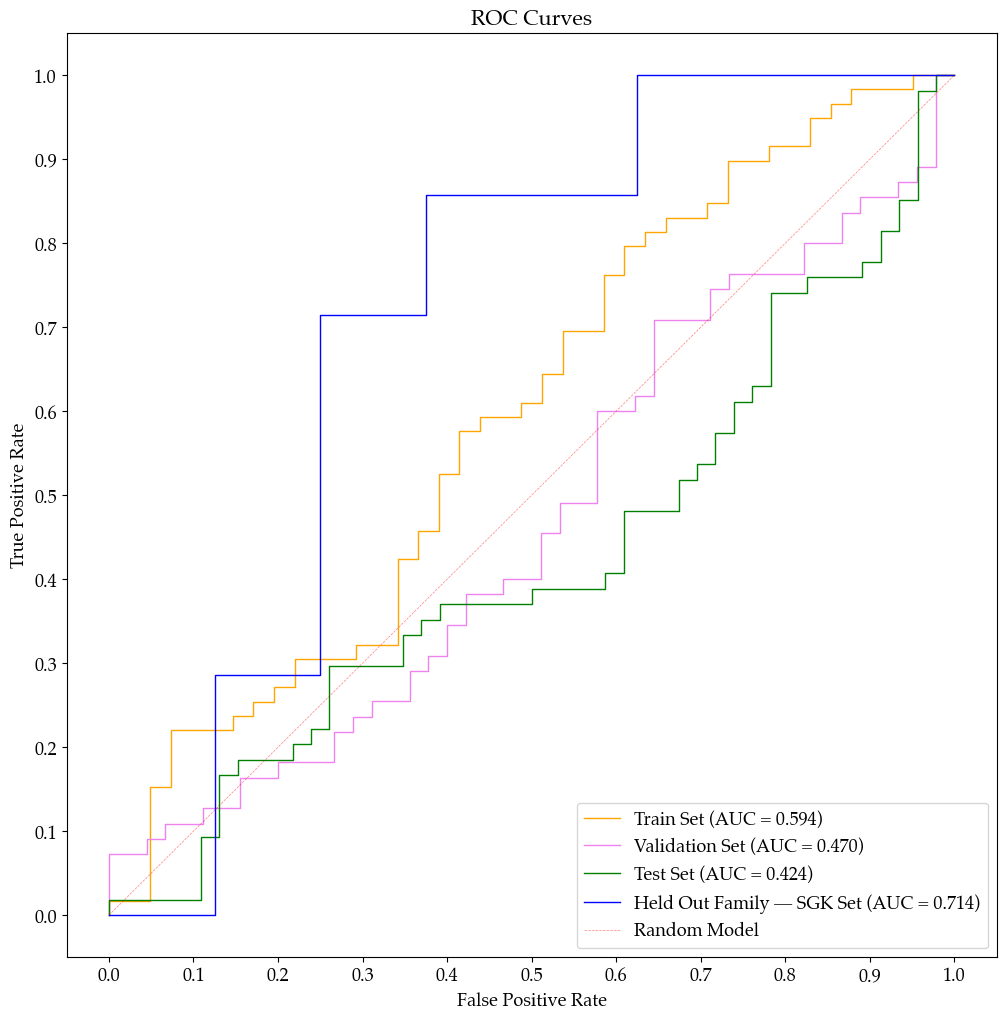

In [14]:
nni.get_all_rocs(tl, vl, te, ho, savefile = "./ROCC")

In [15]:
n = 100
fake_probs = [x/n + random.random()*random.choice([-1, 1])*0.5 for x in range(n)]
mi = min(fake_probs)
ma = max(fake_probs)
fake_probs = [(x - mi)/ma for x in fake_probs]
fake_labels = [0]*(n//2) + [1]*(n//2)

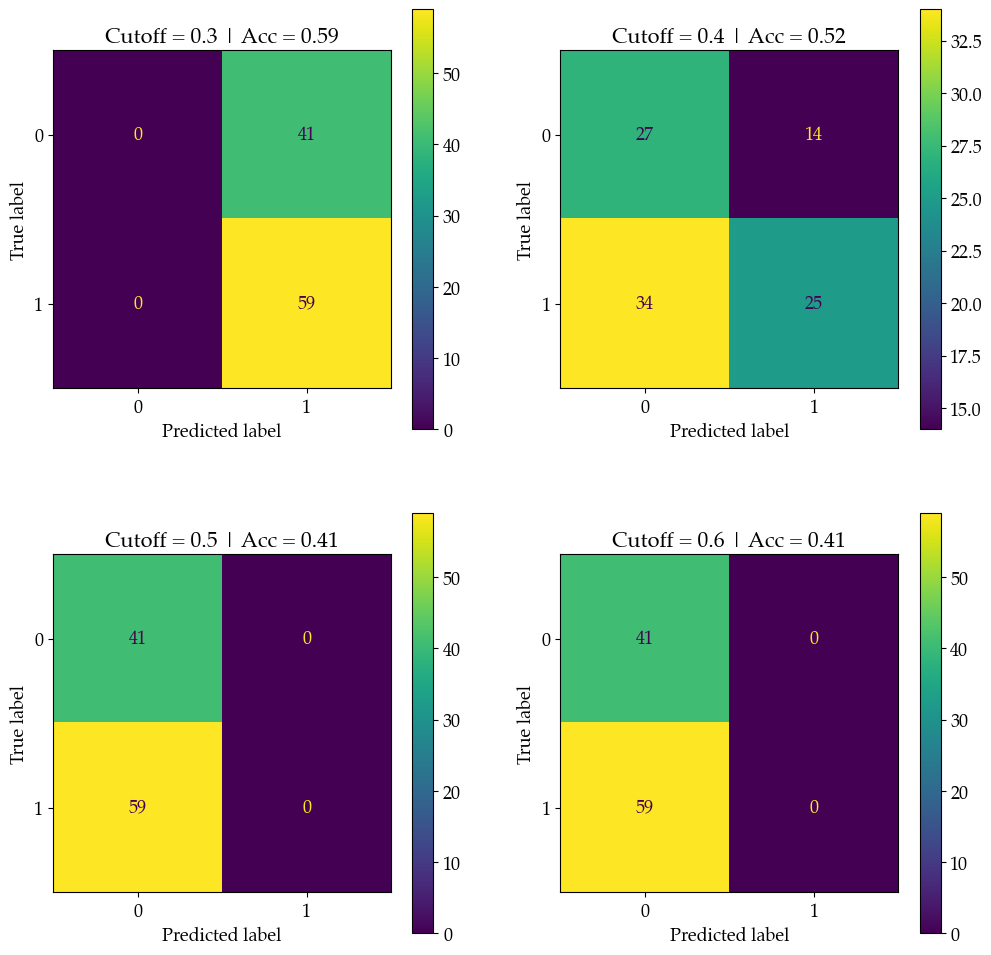

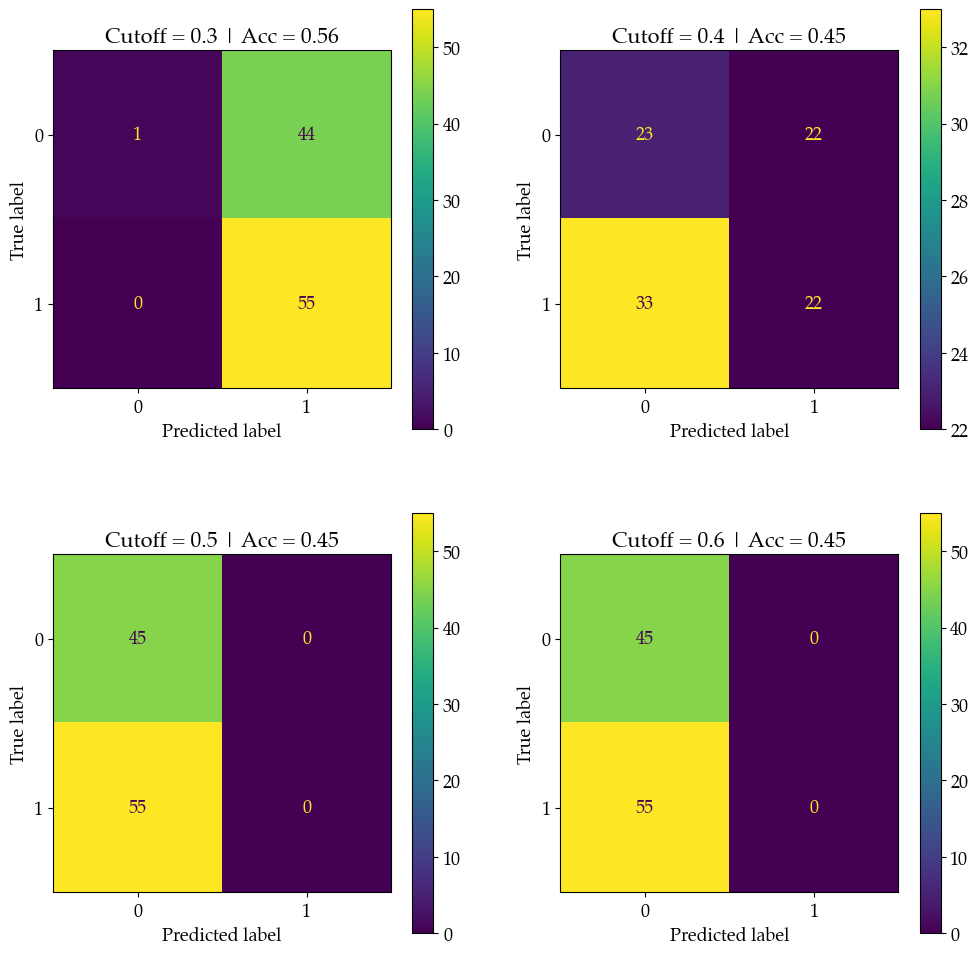

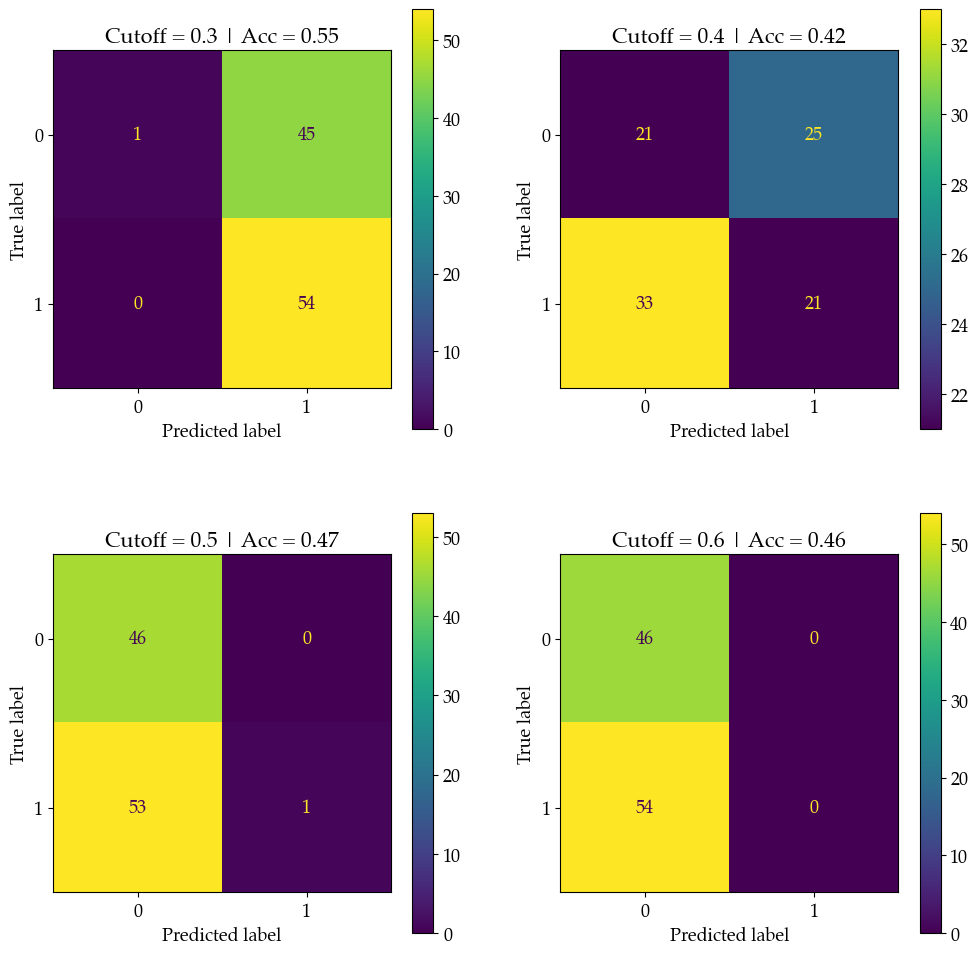

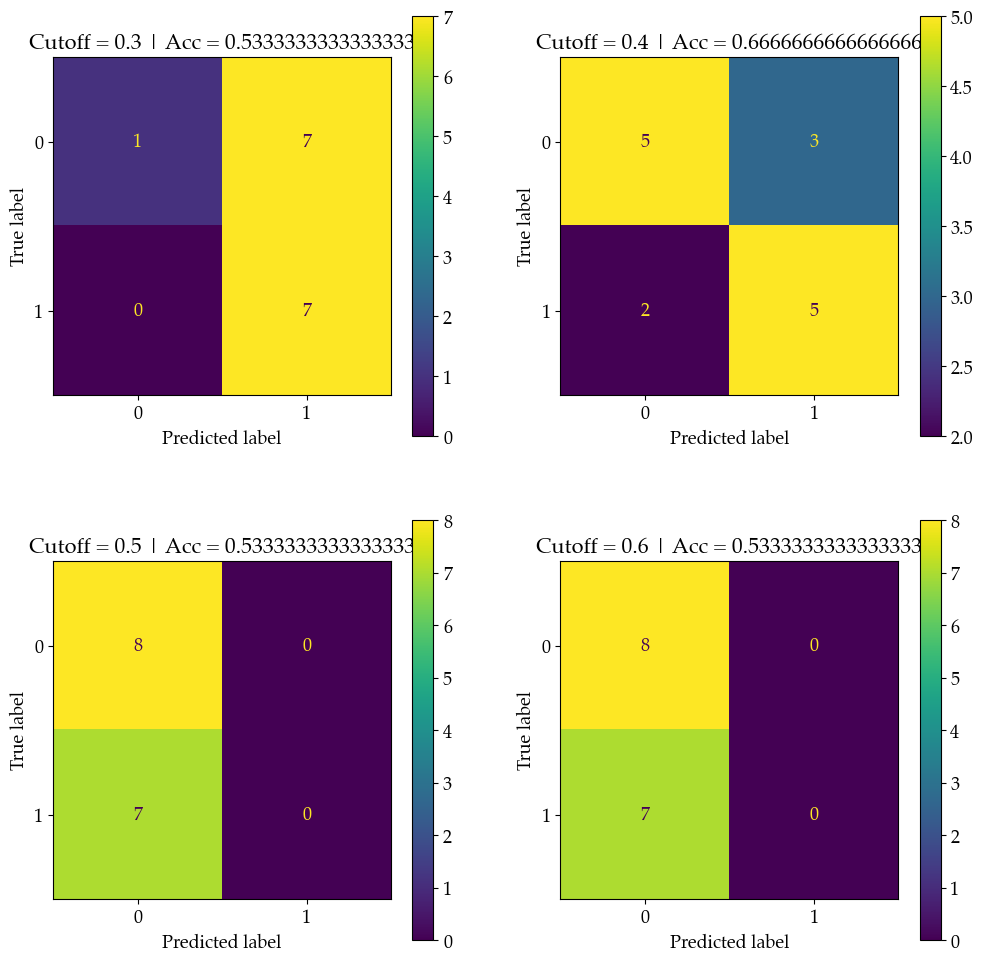

In [36]:
nni.get_all_conf_mats(tl, vl, te, ho, "./All_CM_initial", cutoffs = [0.3, 0.4, 0.5, 0.6])

In [16]:
import sklearn.metrics

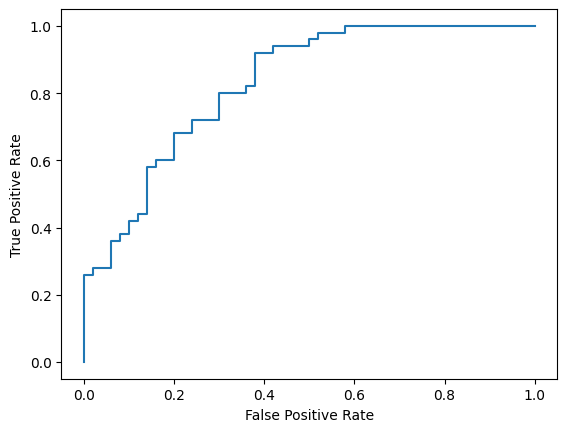

In [26]:
fpr, tpr, _ = sklearn.metrics.roc_curve(fake_labels, fake_probs)
sklearn.metrics.RocCurveDisplay(fpr = fpr, tpr = tpr).plot()

In [23]:
sklearn.metrics.roc_auc_score(fake_labels, fake_probs)

0.8288

In [17]:
fake_preds = []
for cutoff in (co := [0.2, 0.4, 0.5, 0.6, 0.8]):
    fake_preds.append([1 if x > cutoff else 0 for x in fake_probs])

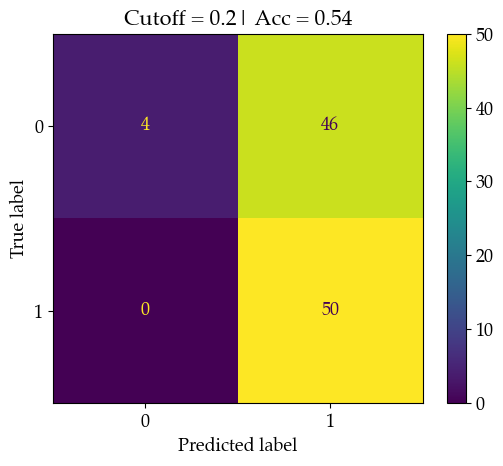

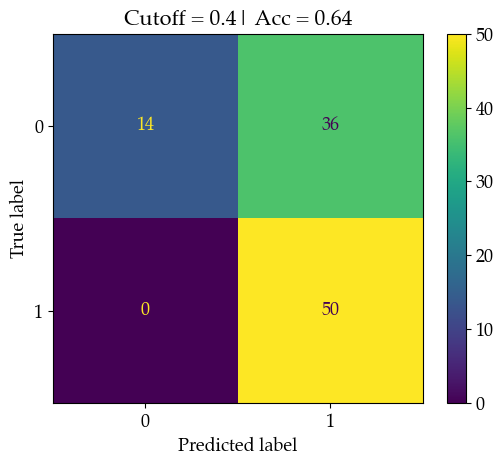

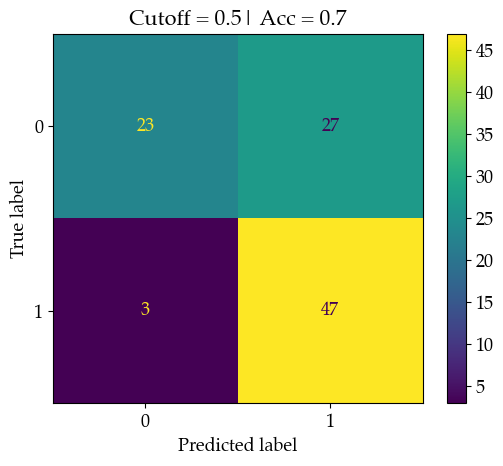

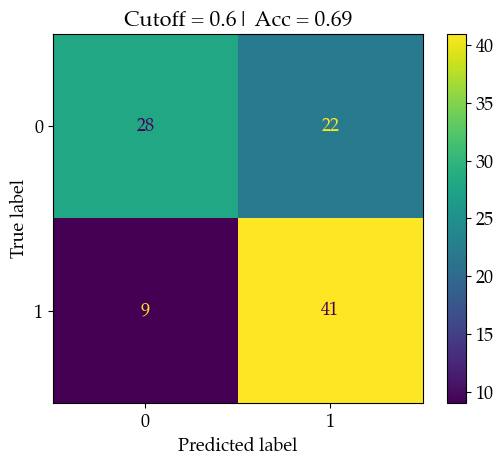

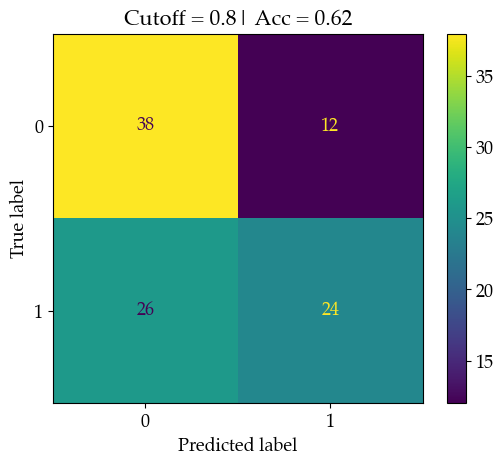

In [18]:
from matplotlib import pyplot as plt

for i, fp in enumerate(fake_preds):
    cm = sklearn.metrics.confusion_matrix(fake_labels, fp)
    sklearn.metrics.ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Cutoff = {co[i]}| Acc = {(cm[0, 0] + cm[1, 1])/sum(cm.ravel())}")
    print(f"")

In [32]:
import sys
sys.path.append("../roc_comparison/")
import compare_auc_delong_xu as delong

In [33]:
random_preds = [random.random() for _ in range(n)]

In [37]:
sklearn.metrics.roc_auc_score(fake_labels, random_preds)

0.4696

In [39]:
import numpy as np

delong.delong_roc_test(np.array(fake_labels), np.array(fake_probs), np.array(random_preds))

array([[-6.81103861]])